# E-Commerce Data Analysis

## 1) Context

<br/>
This work is based on a data set of transnational sales from an UK-based non-store online retail.

Relevant notes:

- All transactions occurred between 01/12/2010 and 09/12/2011;
- The company mainly sells unique all-occasion gifts;
- Many customers of the company are wholesalers.

This data set is available on **The UCI Machine Learning Repository** by the tittle ["Online Retail"](https://archive.ics.uci.edu/ml/datasets/Online+Retail#)
<br/>
<br/>
<br/>

## 2) Insights

## 3) Data Preparation

<br/>
Loading all the modules that will be used:
<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

from pandas_profiling import ProfileReport
import missingno as msno
from datetime import datetime

C:\Users\Joelma\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<br/>
<br/>
<br/>
Then reading the data set and taking the first look:
<br/>
<br/>

In [2]:
df = pd.read_csv('../1985_3404_bundle_archive/data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<br/>
<br/>
<br/>
Let's standardize the dataframe's columns and text.
<br/>
<br/>

In [4]:
# New column names

new_cols = ['invoice_num', 'stock_code', 'description', 'quantity',
            'invoice_date', 'unit_price', 'customer_id', 'country']
df.columns = new_cols

df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# New columns to represent description and country in lower case

# Lowercase description
df.loc[~df['description'].isna(), 'lowercase_description'] = df.loc[
                                                                    ~df['description'].isna(), 'description'
                                                                   ].apply(lambda text: text.lower())

# Lowercase country
df.loc[~df['country'].isna(), 'lowercase_country'] = df.loc[
                                                            ~df['country'].isna(), 'country'
                                                           ].apply(lambda text: text.lower())

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hanging heart t-light holder,united kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,united kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,united kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,united kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart.,united kingdom


<br/>
<br/>
<br/>
Creating a report to get an overview of the data:
<br/>
<br/>

In [7]:
# This doesn't appear on github, but the design is great
# It is used only as an overview
# Everything we need from this will be explored later
profile = ProfileReport(df, title='Profiling E-Commerce',html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.12s/it]


<br/>
<br/>
<br/>
Let's focus on data types.
<br/>
<br/>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   invoice_num            541909 non-null  object 
 1   stock_code             541909 non-null  object 
 2   description            540455 non-null  object 
 3   quantity               541909 non-null  int64  
 4   invoice_date           541909 non-null  object 
 5   unit_price             541909 non-null  float64
 6   customer_id            406829 non-null  float64
 7   country                541909 non-null  object 
 8   lowercase_description  540455 non-null  object 
 9   lowercase_country      541909 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 41.3+ MB


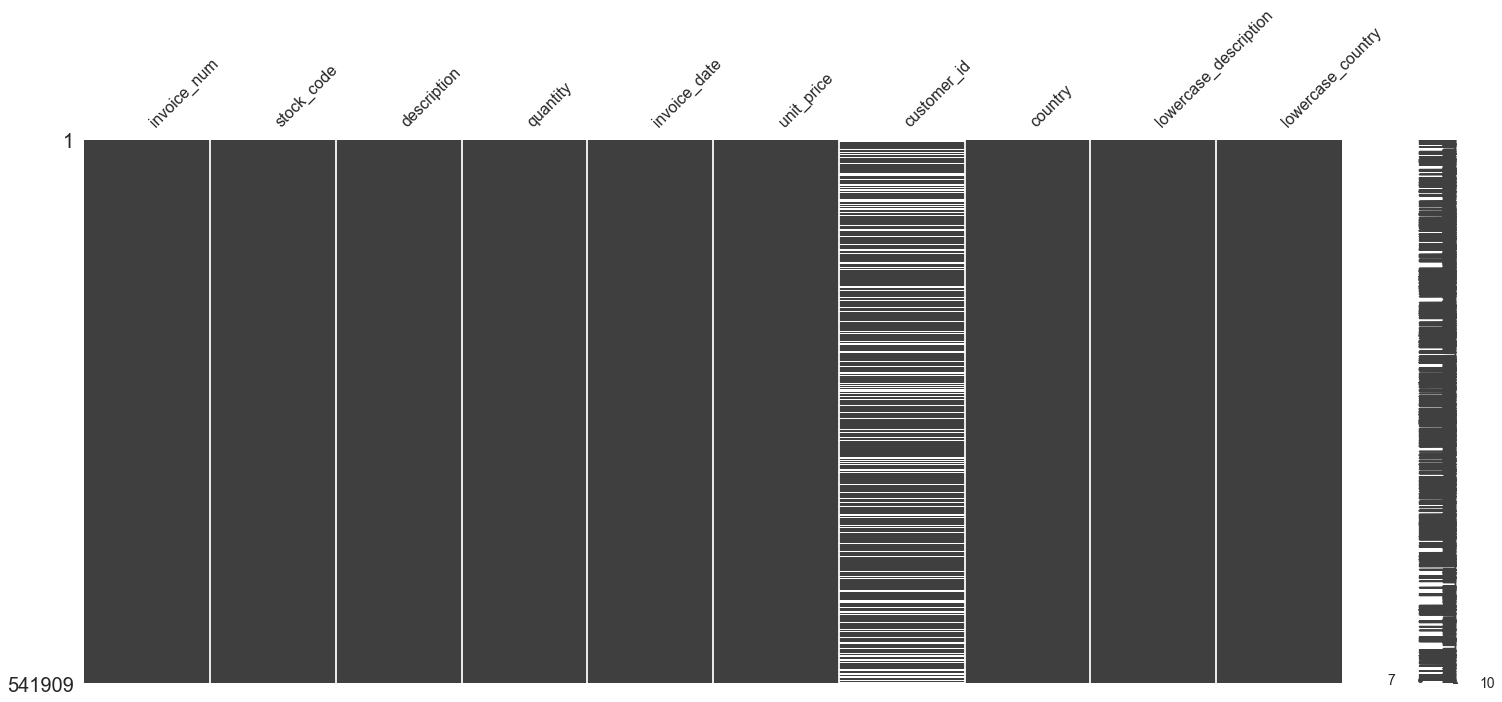

In [9]:
# Distribuition of missing values
msno.matrix(df)

<br/>
<br/>
<br/>
There is no problem in keeping fields that we won't do calculations as "object", such as: invoice_num and stock_code. There are missing values in customer_id, but I will keep it this way for now. I will convert customer_id to string ("object").
<br/>
<br/>

In [10]:
# We don't need ".0" in the end of the customer_id values
df.loc[~df['customer_id'].isna(), 'customer_id'] = df.loc[
                                                          ~df['customer_id'].isna(), 'customer_id'
                                                         ].apply(lambda ID: str(ID)[:-2])

In [11]:
df['customer_id'].value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
13256       1
18184       1
13154       1
15590       1
15657       1
Name: customer_id, Length: 4372, dtype: int64

In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,white hanging heart t-light holder,united kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,white metal lantern,united kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,cream cupid hearts coat hanger,united kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,knitted union flag hot water bottle,united kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,red woolly hottie white heart.,united kingdom


<br/>
<br/>
<br/>
The next step is to transform invoice_date to "datetime".
<br/>
<br/>

In [13]:
df['invoice_date'] = df['invoice_date'].apply(lambda date: datetime.strptime(date, '%m/%d/%Y %H:%M'))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   invoice_num            541909 non-null  object        
 1   stock_code             541909 non-null  object        
 2   description            540455 non-null  object        
 3   quantity               541909 non-null  int64         
 4   invoice_date           541909 non-null  datetime64[ns]
 5   unit_price             541909 non-null  float64       
 6   customer_id            406829 non-null  object        
 7   country                541909 non-null  object        
 8   lowercase_description  540455 non-null  object        
 9   lowercase_country      541909 non-null  object        
 10  year                   541909 non-null  int64         
 11  month                  541909 non-null  int64         
 12  month_day              541909 non-null  int6

<br/>
<br/>
<br/>
I will split the InvoiceDate column into: Year, Month, WeekDay, Hour and YearMonth. This way, we can group our data however we want based on any time analysis.
<br/>
<br/>

In [14]:
df['year'] = df['invoice_date'].apply(lambda time: time.year)

df['month'] = df['invoice_date'].apply(lambda time: time.month)

df['month_day'] = df['invoice_date'].apply(lambda time: time.day)

df['week_day'] = df['invoice_date'].apply(lambda time: time.weekday())

df['hour'] = df['invoice_date'].apply(lambda date: date.hour)

# zfill(2) is used to fill the string with zeros until it is 2 characters long.
df['year_month'] = df['invoice_date'].apply(lambda time: str(time.year) + str(time.month).zfill(2))

In [16]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart t-light holder,united kingdom,2010,12,1,2,8,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,united kingdom,2010,12,1,2,8,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger,united kingdom,2010,12,1,2,8,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle,united kingdom,2010,12,1,2,8,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart.,united kingdom,2010,12,1,2,8,201012


<br/>
<br/>
<br/>
We have quantity and unit_price, but we don't have the amount spent on each line.
<br/>
<br/>

In [17]:
df['amount_spent'] = df['quantity'] * df['unit_price']

<br/>
<br/>
<br/>
Taking a look if there are missing values...
<br/>
<br/>

In [18]:
df.isna().sum().sort_values(ascending=False)

customer_id              135080
lowercase_description      1454
description                1454
country                       0
stock_code                    0
quantity                      0
invoice_date                  0
unit_price                    0
amount_spent                  0
year_month                    0
lowercase_country             0
year                          0
month                         0
month_day                     0
week_day                      0
hour                          0
invoice_num                   0
dtype: int64

<br/>
<br/>
<br/>
Perhaps, there are non-numeric fields with missing values and it did not appear in our previous analysis.
<br/>
<br/>

In [19]:
nullsdict = {}
nulls_vec = ['', 'na', 'nan', 'null']

for col in df.columns:    
    str_nan = df.loc[~df[col].isna(), col].apply(lambda row: row in nulls_vec)
    real_nan = df[col].isna()
    
    nullsdict.update({col:{'str_nan':sum(str_nan),
                           'real_nan':sum(real_nan)}})

pd.DataFrame(nullsdict).T

,str_nan,real_nan
invoice_num,0,0
stock_code,0,0
description,0,1454
quantity,0,0
invoice_date,0,0
unit_price,0,0
customer_id,0,135080
country,0,0
lowercase_description,0,1454
lowercase_country,0,0


<br/>
<br/>
<br/>
We could erase the NaN values, but it will damage the sum of the revenue.
<br/>
<br/>

There is nothing we can do about the customer_id's missing values. I will analyse description column in the Exploratory Data Analysis section.
<br/>
<br/>
<br/>

## 4) Exploratory Data Analysis (EDA)

<br/>
<br/>
In Data Preparation section it was possible to observe missing values in lowercase_description column. Let's take an overview of the products.
<br/>
<br/>

In [20]:
products = df[['stock_code', 'lowercase_description']].drop_duplicates()
products.head()

,stock_code,lowercase_description
0,85123A,white hanging heart t-light holder
1,71053,white metal lantern
2,84406B,cream cupid hearts coat hanger
3,84029G,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.


In [21]:
products['stock_code'].value_counts()

20713    8
23084    8
21830    7
85175    7
21181    6
        ..
23570    1
22292    1
23461    1
21616    1
23177    1
Name: stock_code, Length: 4070, dtype: int64

<br/>
<br/>
<br/>
There is more than one description for the same product. Looking at the product with the stock code equal to 20713...
<br/>
<br/>

In [22]:
products[products['stock_code'] == '20713']

,stock_code,lowercase_description
522,20713,jumbo bag owls
136272,20713,NaN
263884,20713,wrongly marked. 23343 in box
380688,20713,wrongly coded-23343
403534,20713,found
415582,20713,wrongly marked 23343
420390,20713,marked as 23343
422750,20713,wrongly coded 23343


<br/>
<br/>
<br/>
The product with stock_code equal to 20713 actually is "jumbo bag owls". There are missing values, product incorrectly marked as 23343 and found(?).
Regardless, we can assume the revenue amount is correct, so we will not change any description.
<br/>
<br/>

In [23]:
products['stock_code'].map(len).value_counts()

5     4186
6     1518
8       17
12       9
1        5
7        4
4        4
9        3
3        2
2        2
Name: stock_code, dtype: int64

<br/>
<br/>
<br/>
According to the source, if the code starts with letter "C", it indicates a cancellation.
<br/>
<br/>

There are stock_code with different lengths.
<br/>
<br/>

In [24]:
# stock_code with 6 characters
products[products['stock_code'].map(len) == 6].head()

,stock_code,lowercase_description
0,85123A,white hanging heart t-light holder
2,84406B,cream cupid hearts coat hanger
3,84029G,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.
60,82494L,wooden frame antique white


In [26]:
# stock_code with 5 characters
products[products['stock_code'].map(len) == 5].head()

,stock_code,lowercase_description
1,71053,white metal lantern
5,22752,set 7 babushka nesting boxes
6,21730,glass star frosted t-light holder
7,22633,hand warmer union jack
8,22632,hand warmer red polka dot


<br/>
<br/>
<br/>
It seems that stock_code values represented with 6 or 5 characters are standard sales.
<br/>
<br/>

In [27]:
products['stock_code'].map(len).value_counts().index

Int64Index([5, 6, 8, 12, 1, 7, 4, 9, 3, 2], dtype='int64')

In [28]:
# Create a dataframe with stock_code descriptions
def desc_stockcode():
    
    # stock_code lengths different from 5 and 6
    stockcode_len = [8, 12, 1, 7, 4, 9, 3, 2]
    
    stockcode_len = sorted(stockcode_len)
    
    df_stockcode = (products[products['stock_code'].map(len) == stockcode_len[0]])
    
    for length in stockcode_len[1:]:
        df_stockcode = pd.concat([df_stockcode,
                                  products[products['stock_code'].map(len) == length]],
                                  ignore_index=True)
    
    return df_stockcode
                             
desc_stockcode()

,stock_code,lowercase_description
0,D,discount
1,M,manual
2,S,samples
3,m,manual
4,B,adjust bad debt
5,C2,carriage
6,C2,NaN
7,DOT,dotcom postage
8,DOT,NaN
9,POST,postage


<br/>
<br/>
<br/>
Analysing the previous dataframe, stock_code can represent special events as discounts, bad debt and gift vouchers.
<br/>
<br/>

In [29]:
df.describe()

,quantity,unit_price,year,month,month_day,week_day,hour,amount_spent
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,2010.921609,7.553128,15.023096,2.431277,13.078729,17.987795
std,218.081158,96.759853,0.268787,3.509055,8.664063,1.844709,2.443270,378.810824
min,-80995.000000,-11062.060000,2010.000000,1.000000,1.000000,0.000000,6.000000,-168469.600000
25%,1.000000,1.250000,2011.000000,5.000000,7.000000,1.000000,11.000000,3.400000
50%,3.000000,2.080000,2011.000000,8.000000,15.000000,2.000000,13.000000,9.750000
75%,10.000000,4.130000,2011.000000,11.000000,22.000000,4.000000,15.000000,17.400000
max,80995.000000,38970.000000,2011.000000,12.000000,31.000000,6.000000,20.000000,168469.600000


<br/>
<br/>
<br/>
There are negative values in quantity and unit_price.
<br/>
<br/>

In [30]:
len(df[(df['quantity'] < 0)])

10624

In [31]:
len(df[(df['unit_price'] < 0)])

2

<br/>
<br/>
<br/>
There are 10624 negative values in quantity and only 2 in unit_price. I will explore and find the meaning of these values.
<br/>
<br/>

In [32]:
# Starting with unit_price, because there are only 2 negative values.
df[(df['unit_price'] < 0)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,adjust bad debt,united kingdom,2011,8,12,4,14,201108,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,adjust bad debt,united kingdom,2011,8,12,4,14,201108,-11062.06


<br/>
<br/>
<br/>
Negative unit_price values are bad debt.
<br/>
<br/>

In [33]:
# Checking negative quantity
df[(df['quantity'] < 0)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,discount,united kingdom,2010,12,1,2,9,201012,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,set of 3 coloured flying ducks,united kingdom,2010,12,1,2,9,201012,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,plasters in tin circus parade,united kingdom,2010,12,1,2,10,201012,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,pack of 12 pink paisley tissues,united kingdom,2010,12,1,2,10,201012,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,pack of 12 blue paisley tissues,united kingdom,2010,12,1,2,10,201012,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,zinc t-light holder stars small,united kingdom,2011,12,9,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,manual,united kingdom,2011,12,9,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,victorian sewing box large,united kingdom,2011,12,9,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,hanging heart jar t-light holder,united kingdom,2011,12,9,4,11,201112,-1.25


In [34]:
# Checking invoice_num starting character.
df[(df['quantity'] < 0)]['invoice_num'].apply(lambda invoice: invoice[0]).value_counts()

C    9288
5    1336
Name: invoice_num, dtype: int64

In [35]:
df[(df['quantity'] < 0)].sort_values('invoice_num')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,1,2,16,201012,-0.00
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,2,3,14,201012,-0.00
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,zinc t-light holder stars small,united kingdom,2011,12,9,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,manual,united kingdom,2011,12,9,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,victorian sewing box large,united kingdom,2011,12,9,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,hanging heart jar t-light holder,united kingdom,2011,12,9,4,11,201112,-1.25


In [36]:
# How many sales had unit_price equal to 0?
sum(df['unit_price'] == 0)

2515

In [37]:
# How many invoice_num codes start with "5"?
sum(df[df['unit_price'] == 0]['invoice_num'].apply(lambda invoice: invoice[0] == '5'))

2515

<br/>
<br/>
<br/>
All invoices with free itens have invoice_num starting with "5"
<br/>
<br/>

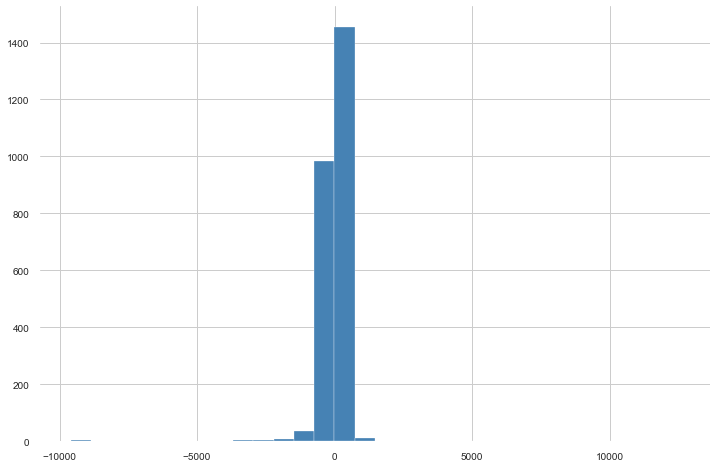

In [45]:
# Analysing unit_price equal 0
plt.figure(figsize=(12,8))
df[df['unit_price'] == 0]['quantity'].hist(bins=30, color='steelblue')

In [38]:
# Descriptions of "free items" with positive quantity
df[(df['quantity'] > 0) & (df['unit_price'] == 0)]['lowercase_description'].value_counts()

check                                  39
found                                  34
amazon                                 18
adjustment                             16
french blue metal door sign 1           9
                                       ..
add stock to allocate online orders     1
cream sweetheart letter rack            1
asstd multicolour circles mug           1
asstd design 3d paper stickers          1
wrongly coded 20713                     1
Name: lowercase_description, Length: 241, dtype: int64

In [39]:
# Descriptions of "free items" with negative quantity
df[(df['quantity'] < 0) & (df['unit_price'] == 0)]['lowercase_description'].value_counts()

check                         123
damaged                        57
damages                        46
?                              41
sold as set on dotcom          20
                             ... 
????missing                     1
thrown away-can't sell.         1
damages/credits from asos.      1
faulty                          1
display                         1
Name: lowercase_description, Length: 127, dtype: int64

<br/>
<br/>
<br/>
There are positive and negative quantity values for invoices with unit_price equal to 0. Some of them are damaged or from display as we can see. Perhaps some are free items for promotions or events.
<br/>
<br/>

Now that we know our data set better, let's do some visualization and answer some questions.
<br/>
<br/>
<br/>

### 4.1) How were sales over the months?

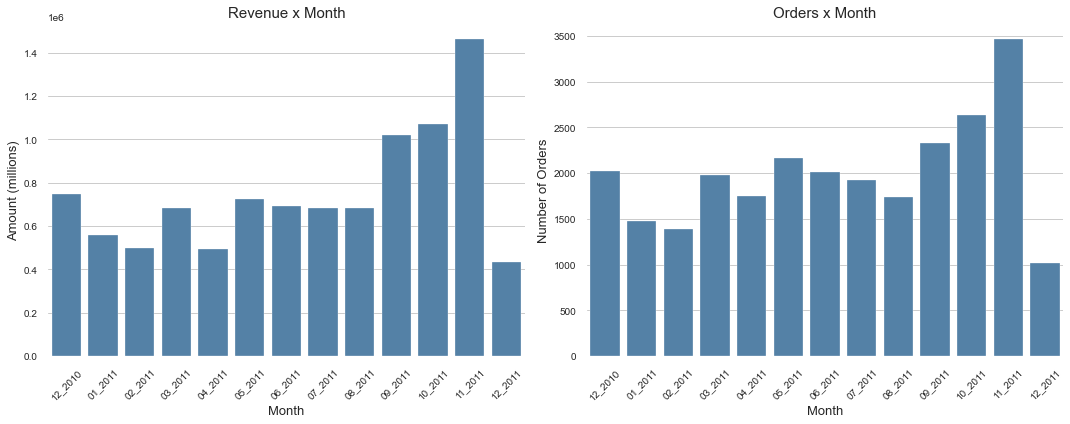

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Revenue x Month
ax = df.groupby('year_month').sum()['amount_spent']

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('Revenue x Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Amount (millions)', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

# Orders x Month
ax = df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders x Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

plt.tight_layout()

<br/>
<br/>
<br/>
Remember that sales occurred between 01/12/2010 and 09/12/2011. December 2011 sales go through the 9th.
<br/>
<br/>

### Average Ticket

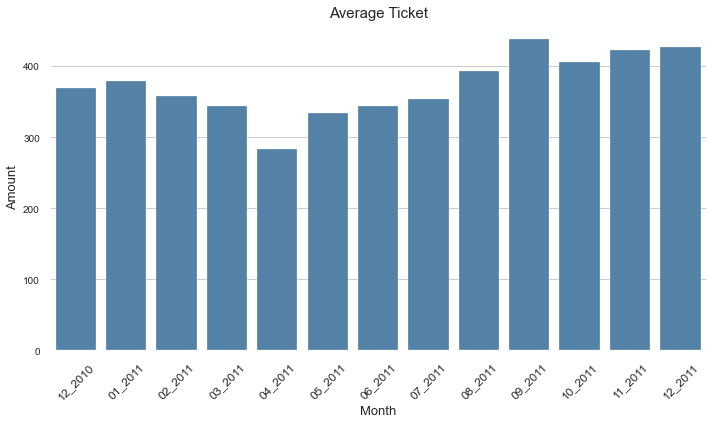

In [49]:
plt.figure(figsize=(10,6))

ax1 = df.groupby('year_month')['amount_spent'].sum()
ax2 = df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()
# Removing the index brackets
ax2.index = [index[0] for index in ax2.index]
ax = ax1 / ax2

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Average Ticket', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Amount', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

plt.xticks(ticks=range(len(label)), labels=label, rotation=45, fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>

### 4.2) How orders were distributed by day (of month)

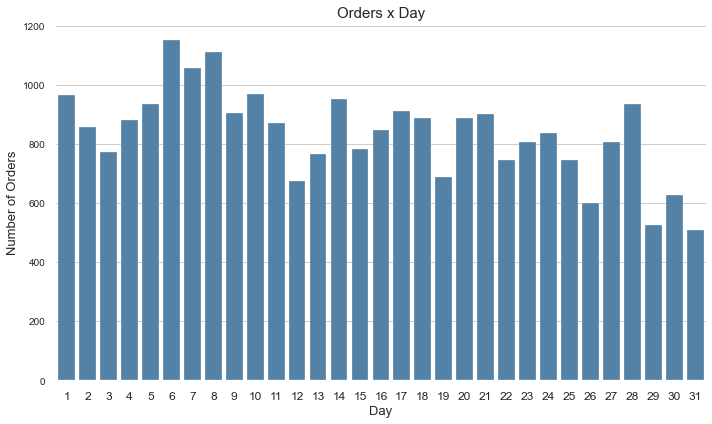

In [71]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders x Day', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

<br/>

### 4.3) How orders were distributed by day (of week):

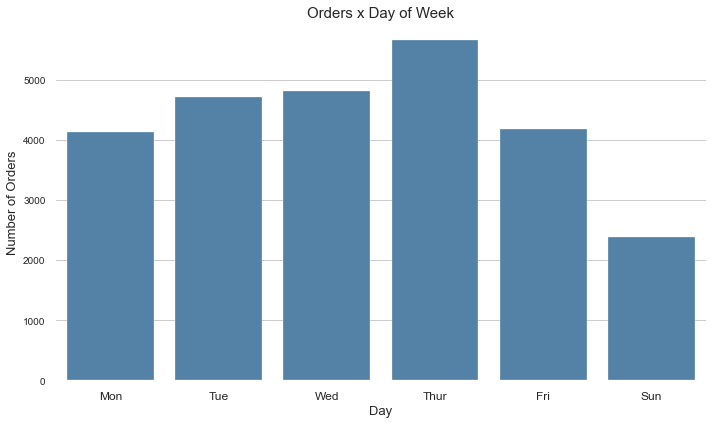

In [51]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['week_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders x Day of Week', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

# WeekDay goes from 0-Monday to 6-Sunday
label = ['Mon','Tue','Wed','Thur','Fri','Sun']
tick = range(len(label))

plt.xticks(ticks=tick, labels=label, fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>

### 4.4) How orders were distributed by hour?

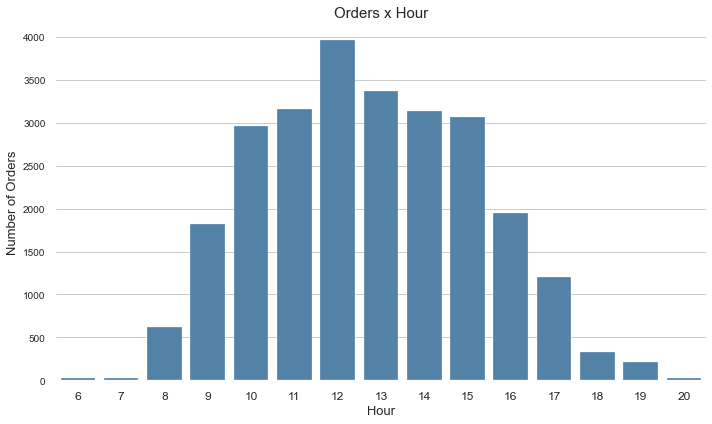

In [52]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders x Hour', fontsize=15)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>
Sales are concetrated around noon. Probably because it's lunchtime.
<br/>
<br/>
<br/>

### 4.5) How many orders for each country?

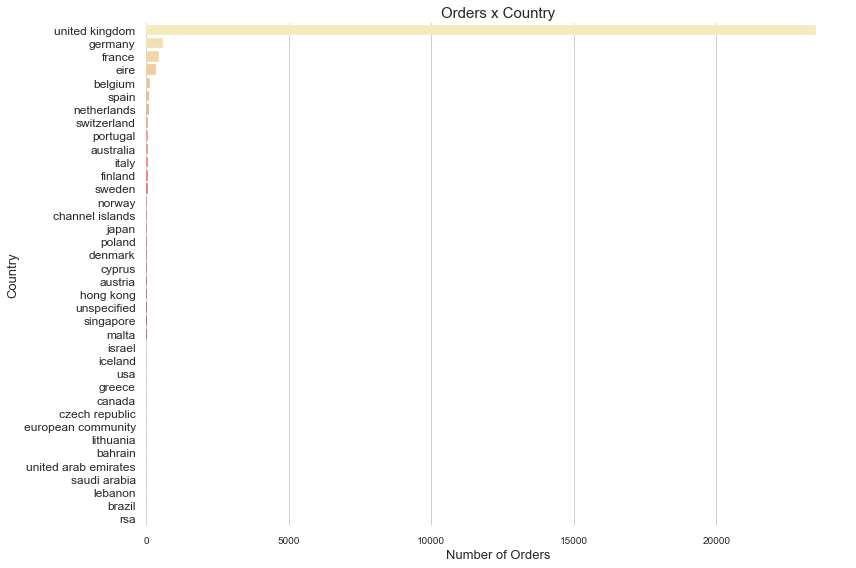

In [53]:
plt.figure(figsize=(12,8))

ax = df.groupby('invoice_num')['lowercase_country'].unique().value_counts()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Orders x Country', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

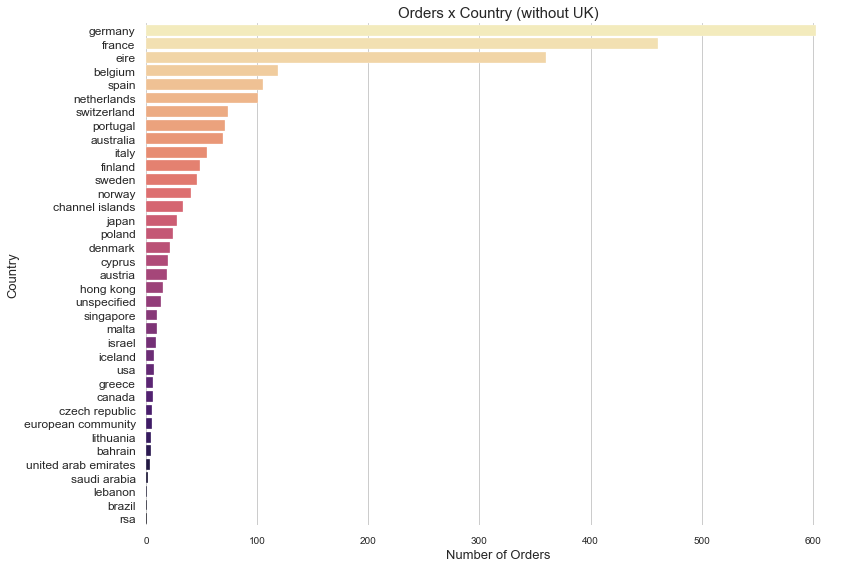

In [54]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('invoice_num')['lowercase_country'].unique().value_counts().iloc[1:]

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Orders x Country (without UK)', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>

### 4.6) How much money did each country spent?

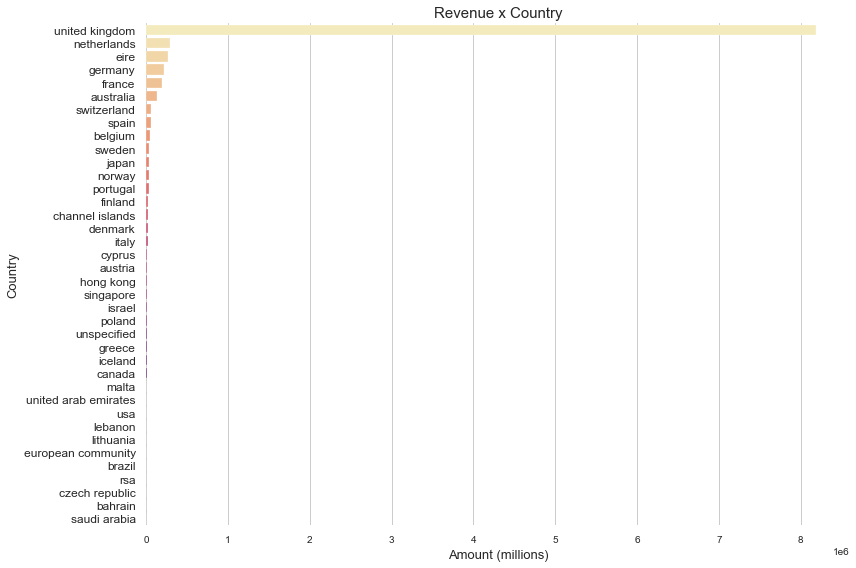

In [55]:
plt.figure(figsize=(12,8))

ax = df.groupby('lowercase_country').sum()['amount_spent'].sort_values(ascending=False)

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Revenue x Country', fontsize=15)
plt.xlabel('Amount (millions)', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

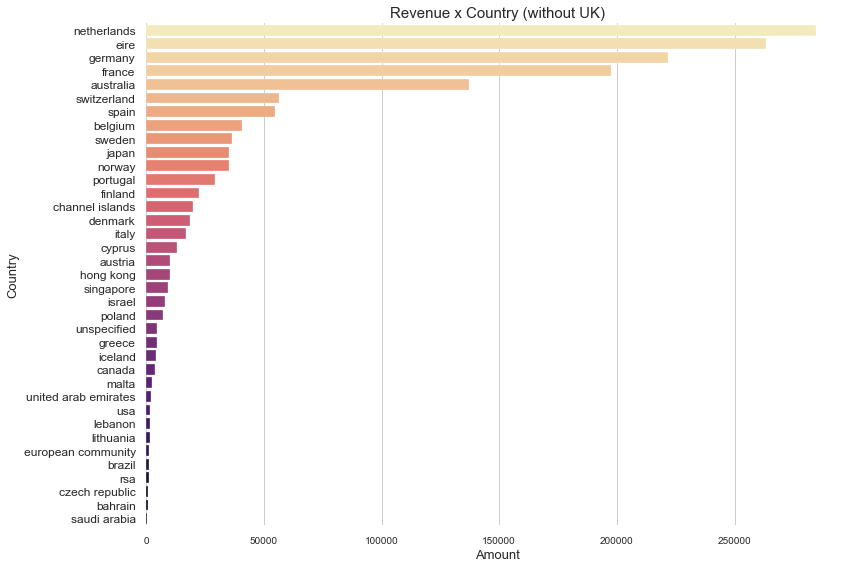

In [56]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('lowercase_country').sum()['amount_spent'].sort_values(ascending=False).iloc[1:]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Revenue x Country (without UK)', fontsize=15)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>

### 4.7) Is there a pattern to "free items"?

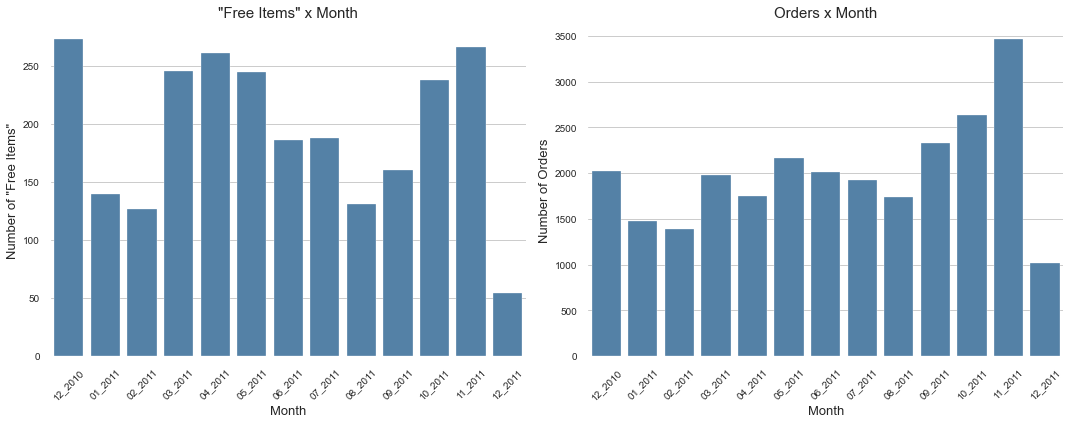

In [57]:
# Comparing the number of "free items" and the number of orders per month
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Month
ax = df[df['unit_price'] == 0].groupby('year_month').count()['stock_code'].sort_index()

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('"Free Items" x Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

# Orders x Month
ax = df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders x Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

plt.tight_layout()

<br/>
<br/>
<br/>
It seems that there is no pattern for the distribuition over the months.
<br/>
<br/>

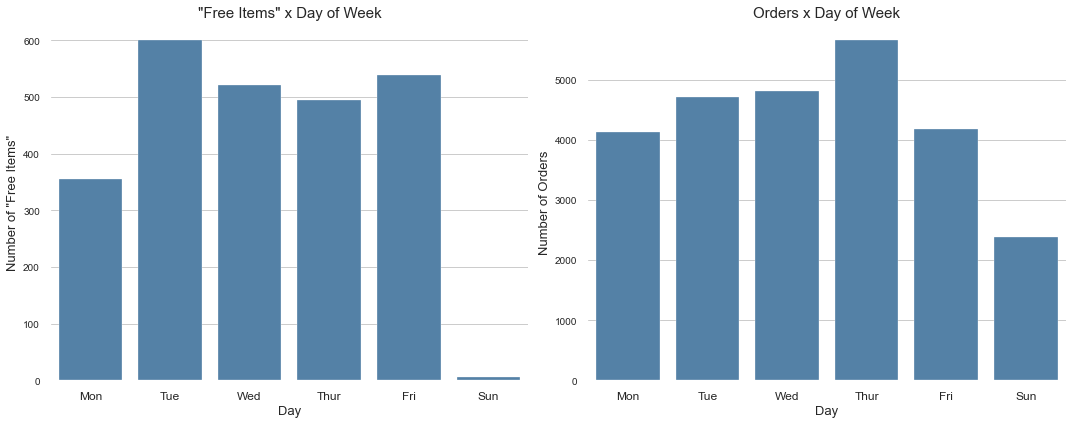

In [58]:
# Comparing the number of "free items" and the number of orders per day of week
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Day of Week
ax = df[df['unit_price'] == 0].groupby('week_day').count()['stock_code'].sort_index()

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('"Free Items" x Day of Week', fontsize=15)
axes[0].set_xlabel('Day', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

# WeekDay goes from 0-Monday to 6-Sunday
label = ['Mon','Tue','Wed','Thur','Fri','Sun']

axes[0].set_xticklabels(label, fontsize=12)

# Orders x Day of Week
ax = df.groupby('invoice_num')['week_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders x Day of Week', fontsize=15)
axes[1].set_xlabel('Day', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, fontsize=12)

plt.tight_layout()

<br/>
<br/>
<br/>
Sunday has, virtually, no "free item". Although the other days have a considerable amount of "free items", there is no pattern if we take a look at the orders per day of week distribution.
<br/>
<br/>

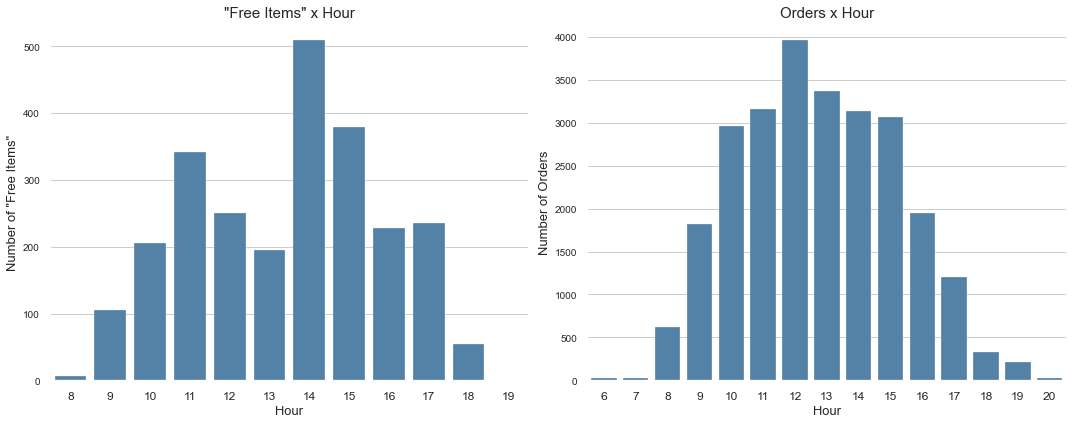

In [59]:
# Comparing the number of "free items" and the number of orders per hour
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# "Free Items" x Hour
ax = df[df['unit_price'] == 0].groupby('hour').count()['stock_code'].sort_index()

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('"Free Items" x Hour', fontsize=15)
axes[0].set_xlabel('Hour', fontsize=13)
axes[0].set_ylabel('Number of "Free Items"', fontsize=13)

axes[0].set_xticklabels(labels=ax.index, fontsize=12)

# Orders x Hour
ax = df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders x Hour', fontsize=15)
axes[1].set_xlabel('Hour', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(labels=ax.index, fontsize=12)

plt.tight_layout()

<br/>
<br/>
<br/>

### 4.8) What are the most common stock codes?

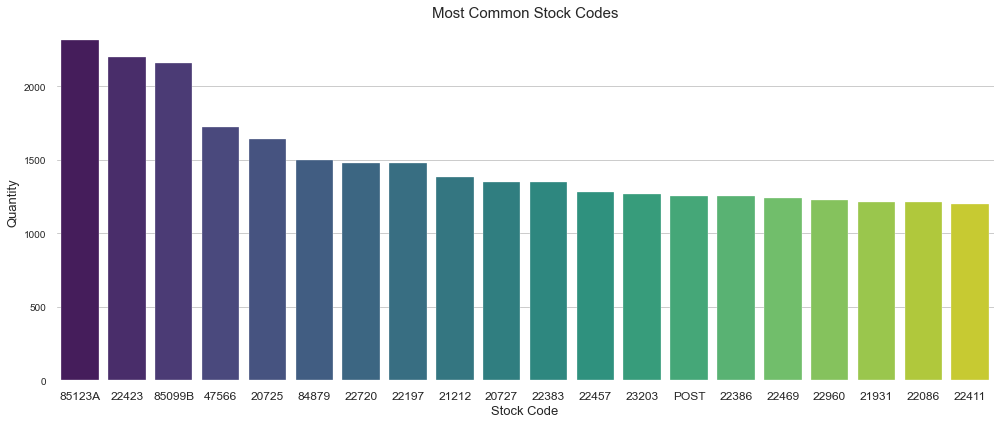

In [60]:
plt.figure(figsize=(14,6))

# The 20 most common stock codes
ax = df['stock_code'].value_counts()[:20]

sns.barplot(x=ax.index, y=ax, palette='viridis')

plt.title('Most Common Stock Codes', fontsize=15)
plt.xlabel('Stock Code', fontsize=13)
plt.ylabel('Quantity', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>
Taking a look at who these guys are...
<br/>
<br/>

In [61]:
common_codes = []

for code in df['stock_code'].value_counts()[:20].index:
    common_codes.append((code, products[
                                        (products[~products.isna()]['stock_code'] == code)
                                       ]['lowercase_description'].iloc[0]))

pd.DataFrame(common_codes, columns=['stock_code', 'description'])

,stock_code,description
0,85123A,white hanging heart t-light holder
1,22423,regency cakestand 3 tier
2,85099B,jumbo bag red retrospot
3,47566,party bunting
4,20725,lunch bag red retrospot
5,84879,assorted colour bird ornament
6,22720,set of 3 cake tins pantry design
7,22197,small popcorn holder
8,21212,pack of 72 retrospot cake cases
9,20727,lunch bag black skull.


In [77]:
df.groupby('year_month')['stock_code']

,year_month,stock_code
0,201012,85123A
1,201012,71053
2,201012,84406B
3,201012,84029G
4,201012,84029E
...,...,...
541904,201112,22613
541905,201112,22899
541906,201112,23254
541907,201112,23255
